## 네이버 쇼핑 리뷰와, 영화평 리뷰를 섞은 데이터
    - vocab_size, max_len, embedding_vector, hidden_units
    - SimpleRNN, GRU, LSTM, Conv1D


* 데이터 다운

In [74]:
'''!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220111.sh'''

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 23.64 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-01-27 06:15:00--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/d

In [40]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 네이버 쇼핑데이터 

In [41]:
url = 'https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt'
df1 = pd.read_table(url, names=['ratings', 'reviews'])
df1.head()

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [42]:
# 평점이 4, 5점인 데이터를 1(긍정)
df1['label'] = df1.apply(lambda x:1 if x.ratings > 3 else 0, axis=1)
df1.head()

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


* 데이터 전처리

In [43]:
# 각 열별로 중복 확인
df1.shape, df1.ratings.nunique(), df1.reviews.nunique()

((200000, 3), 4, 199908)

In [44]:
# 중복 제거
df1.drop_duplicates(subset=['reviews'], inplace=True)

In [45]:
# Null 값 제거 - 0 이 나오면 결측치가 없음
df1.isnull().sum().sum()

0

* 한글 이외의 데이터는 제거

In [46]:
df1.reviews = df1.reviews.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')

In [47]:
# Null 데이터가 생기면 제거
df1.reviews.replace('', np.nan, inplace=True)
df1.reviews.isnull().sum()

0

## 네이버 영화평

In [48]:
df2 = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", sep='\t')
df2.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


* 데이터 전처리

In [49]:
# 중복 여부 확인
df2.shape, df2.document.nunique()

((200000, 3), 194543)

In [50]:
# 중복 데이터 배제
df2.drop_duplicates(subset=['document'], inplace=True)
df2.shape

(194544, 3)

In [51]:
# Null 데이터 있는지 확인
df2.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [52]:
# Null data 제거
df2.dropna(how='any', inplace=True)

In [53]:
# 한글 이외의 문자는 공백으로 처리하고 strip
df2.document = df.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ').str.strip()
df2.head(3)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1


In [54]:
# '' 만 남은 데이터 --> np.nan으로 변경시킨 후 제거
df2.document.replace('', np.nan, inplace=True)
df2.document.isna().sum()

1025

In [55]:
# Null data 제거
df2.dropna(how='any', inplace=True)
df2.shape

(193518, 3)

# 두 데이터 df1(쇼핑리뷰), df2(영화리뷰) 합치기
    - df1 ['review'] -> ['document'] 로 변환

In [57]:
df1.rename(columns={'reviews':'document'}, inplace=True)
df1.head(3)

,ratings,document,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...,1


In [63]:
df1 = df1[['document', 'label']]
df1.head(3)

,document,label
0,배공빠르고 굿,1
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...,1


In [66]:
df2 = df2[['document', 'label']]
df2.head(3)

,document,label
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...,1
2,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1


In [68]:
df = pd.merge(df1, df2, how='outer')
df.head()

,document,label
0,배공빠르고 굿,1
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...,1
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...,0
4,민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [71]:
# 중복데이터 확인
df.shape ,df.document.nunique()

((393723, 2), 390161)

In [72]:
# 중복 데이터 배제
df.drop_duplicates(subset=['document'], inplace=True)
df.shape

(390161, 2)

* 훈련/테스트 데이터셋 분리

In [90]:
# 훈련 데이터 : 테스트 데이터 = 3 : 1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.document.values, df.label.values, stratify=df.label.values, 
    test_size = 0.25, random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292620,), (97541,), (292620,), (97541,))

In [91]:
# 훈련 데이터 레이블의 분포
np.unique(y_train, return_counts=True)

(array([0, 1]), array([146391, 146229]))

* 토큰화

In [92]:
from konlpy.tag import Mecab

In [93]:
mecab = Mecab()
stopwords = stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [94]:
X_train = [mecab.morphs(review) for review in X_train]
X_train = list(map(lambda s: [item for item in s if item not in stopwords], X_train))

In [95]:
X_test = [mecab.morphs(review) for review in X_test]
X_test = list(map(lambda s: [item for item in s if item not in stopwords], X_test)) 

In [ ]:
print(X_test[0])

* 단어와 길이 분포 확인하기

In [96]:
positive_words = []
for i in range(len(y_train)):
    if y_train[i] == 1:
       positive_words += X_train[i] 

In [98]:
from collections import Counter
Counter(['a','b','a'])

Counter({'a': 2, 'b': 1})

In [99]:
positive_words_count = Counter(positive_words)
len(positive_words)

1894015

In [100]:
print(positive_words_count.most_common(20))

[('좋', 49216), ('영화', 29352), ('네요', 25845), ('잘', 23370), ('어요', 23196), ('있', 23061), ('아요', 22288), ('는데', 17601), ('습니다', 17575), ('보', 17293), ('구매', 16165), ('너무', 14378), ('했', 13616), ('배송', 12208), ('같', 12082), ('었', 11489), ('합니다', 11070), ('재', 10599), ('아', 10581), ('어', 10378)]


In [101]:
negative_words = []
for i in range(len(y_train)):
    if y_train[i] == 0:
        negative_words += X_train[i]

In [102]:
negative_words_count = Counter(negative_words)
print(negative_words_count.most_common(20))

[('네요', 34752), ('영화', 27872), ('안', 26410), ('는데', 25820), ('없', 19653), ('있', 19195), ('너무', 18320), ('보', 17435), ('했', 16013), ('어요', 15760), ('나', 14837), ('만', 13935), ('거', 13765), ('좋', 13597), ('같', 13453), ('어', 13383), ('되', 12227), ('로', 11910), ('않', 11876), ('그냥', 11386)]


* 인코딩

In [110]:
from tensorflow.keras.preprocessing.text import Tokenizer

tok = Tokenizer()
tok.fit_on_texts(X_train)

In [111]:
threshold = 3
total_cnt = len(tok.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [112]:
for key, value in tok.word_counts.items():
    total_freq += value
    if value < threshold:       # 단어의 등장 빈도가 threshold보다 작을 경우
        rare_cnt += 1
        rare_freq += value

In [113]:
print('단어 집합(vocabulary)의 크기 :', total_cnt)
print(f'등장 빈도가 {threshold - 1}번 이하인 희귀 단어의 수: {rare_cnt}')
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69983
등장 빈도가 2번 이하인 희귀 단어의 수: 38711
단어 집합에서 희귀 단어의 비율: 55.31486218081534
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.1639941594570118


* 등장 빈도가 2회 이하인 단어는 제외하고 토큰화

In [114]:
# 0번 패딩 토큰과 1번 OOV(Out-of-Value) 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
vocab_size

31274

In [115]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

### 패딩

리뷰의 최대 길이 : 85
리뷰의 평균 길이 : 13.95387191579523


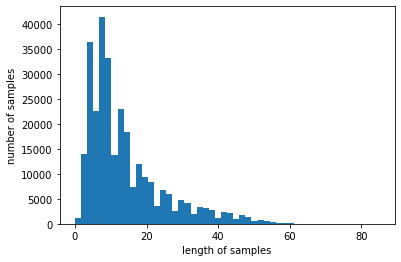

In [116]:
print('리뷰의 최대 길이 :', max(len(review) for review in X_train))
print('리뷰의 평균 길이 :', sum(map(len, X_train))/len(X_train))

plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [117]:
# 리뷰 길이를 60으로 패딩
max_len = 60

In [118]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [139]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Conv1D, MaxPooling1D, Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## 1) SimpleRNN

In [123]:
model1 = Sequential([
    Embedding(vocab_size, 100, input_length=max_len),
    SimpleRNN(32, activation='tanh'), # 오차 역전파시, 하이퍼볼릭탄젠트 함수의 미분값이 최대 1로서 기타 다른 오차함수의 미분값 보다 딥러닝환경에서 좋다.
    Dense(1, activation='sigmoid') # 0과 1을 분류해내는 출력층에서는 Sigmoid함수, 다중클래스 분류를 해야하는 경우라면 소프트맥스 회귀를 사용하는 소프트맥스 함수를 사용
])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 60, 100)           3127400   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,131,689
Trainable params: 3,131,689
Non-trainable params: 0
_________________________________________________________________


In [124]:
model1.compile('adam', 'binary_crossentropy', ['accuracy'])

In [125]:
model_path = 'best-sentiment.h5'
checkpoint = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
early_stop = EarlyStopping(patience=5)

In [126]:
hist = model1.fit(X_train, y_train, epochs=100, batch_size=64,
                 validation_split=0.2, callbacks=[checkpoint, early_stop])

Epoch 1/100
3658/3658 [==============================] - ETA: 0s - loss: 0.3539 - accuracy: 0.8488
Epoch 00001: val_loss improved from inf to 0.31412, saving model to best-sentiment.h5
3658/3658 [==============================] - 294s 79ms/step - loss: 0.3539 - accuracy: 0.8488 - val_loss: 0.3141 - val_accuracy: 0.8700
Epoch 2/100
3658/3658 [==============================] - ETA: 0s - loss: 0.2656 - accuracy: 0.8945
Epoch 00002: val_loss did not improve from 0.31412
3658/3658 [==============================] - 246s 67ms/step - loss: 0.2656 - accuracy: 0.8945 - val_loss: 0.3210 - val_accuracy: 0.8704
Epoch 3/100
3658/3658 [==============================] - ETA: 0s - loss: 0.2023 - accuracy: 0.9238
Epoch 00003: val_loss did not improve from 0.31412
3658/3658 [==============================] - 320s 88ms/step - loss: 0.2023 - accuracy: 0.9238 - val_loss: 0.3389 - val_accuracy: 0.8667
Epoch 4/100
3658/3658 [==============================] - ETA: 0s - loss: 0.1540 - accuracy: 0.9435
Epoch 00

In [127]:
best_model=load_model(model_path)
best_model.evaluate(X_test, y_test)

3049/3049 [==============================] - 20s 7ms/step - loss: 0.3207 - accuracy: 0.8675


[0.32071948051452637, 0.8675018548965454]

## 2) GRU

In [128]:
model2 = Sequential([
    Embedding(vocab_size, 100, input_length=max_len),
    GRU(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 60, 100)           3127400   
                                                                 
 gru (GRU)                   (None, 32)                12864     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,140,297
Trainable params: 3,140,297
Non-trainable params: 0
_________________________________________________________________


In [129]:
model2.compile('adam', 'binary_crossentropy', ['accuracy'])

In [130]:
model_path = 'best-sentiment.h5'
checkpoint = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
early_stop = EarlyStopping(patience=5)

In [131]:
hist = model2.fit(X_train, y_train, epochs=100, batch_size=256,
                 validation_split=0.2, callbacks=[checkpoint, early_stop])

Epoch 1/100
911/915 [============================>.] - ETA: 0s - loss: 0.3474 - accuracy: 0.8524
Epoch 00001: val_loss improved from inf to 0.29987, saving model to best-sentiment.h5
915/915 [==============================] - 12s 9ms/step - loss: 0.3473 - accuracy: 0.8525 - val_loss: 0.2999 - val_accuracy: 0.8756
Epoch 2/100
915/915 [==============================] - ETA: 0s - loss: 0.2630 - accuracy: 0.8949
Epoch 00002: val_loss improved from 0.29987 to 0.28578, saving model to best-sentiment.h5
915/915 [==============================] - 8s 9ms/step - loss: 0.2630 - accuracy: 0.8949 - val_loss: 0.2858 - val_accuracy: 0.8837
Epoch 3/100
909/915 [============================>.] - ETA: 0s - loss: 0.2254 - accuracy: 0.9125
Epoch 00003: val_loss did not improve from 0.28578
915/915 [==============================] - 8s 8ms/step - loss: 0.2254 - accuracy: 0.9125 - val_loss: 0.2905 - val_accuracy: 0.8817
Epoch 4/100
911/915 [============================>.] - ETA: 0s - loss: 0.1966 - accuracy

In [132]:
best_model=load_model(model_path)
best_model.evaluate(X_test, y_test)

3049/3049 [==============================] - 11s 3ms/step - loss: 0.2940 - accuracy: 0.8810


[0.29396623373031616, 0.8809936046600342]

## 3)LSTM

In [133]:
model3 = Sequential([
    Embedding(vocab_size, 100, input_length=max_len),
    LSTM(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 60, 100)           3127400   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,144,457
Trainable params: 3,144,457
Non-trainable params: 0
_________________________________________________________________


In [134]:
model3.compile('adam', 'binary_crossentropy', ['accuracy'])

In [135]:
model_path = 'best-sentiment.h5'
checkpoint = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
early_stop = EarlyStopping(patience=5)

In [136]:
hist = model3.fit(X_train, y_train, epochs=100, batch_size=200,
                 validation_split=0.2, callbacks=[checkpoint, early_stop])

Epoch 1/100
1166/1171 [============================>.] - ETA: 0s - loss: 0.3421 - accuracy: 0.8531
Epoch 00001: val_loss improved from inf to 0.29895, saving model to best-sentiment.h5
1171/1171 [==============================] - 13s 9ms/step - loss: 0.3420 - accuracy: 0.8531 - val_loss: 0.2990 - val_accuracy: 0.8759
Epoch 2/100
1171/1171 [==============================] - ETA: 0s - loss: 0.2570 - accuracy: 0.8972
Epoch 00002: val_loss improved from 0.29895 to 0.28328, saving model to best-sentiment.h5
1171/1171 [==============================] - 11s 9ms/step - loss: 0.2570 - accuracy: 0.8972 - val_loss: 0.2833 - val_accuracy: 0.8849
Epoch 3/100
1171/1171 [==============================] - ETA: 0s - loss: 0.2169 - accuracy: 0.9153
Epoch 00003: val_loss did not improve from 0.28328
1171/1171 [==============================] - 10s 9ms/step - loss: 0.2169 - accuracy: 0.9153 - val_loss: 0.2940 - val_accuracy: 0.8827
Epoch 4/100
1167/1171 [============================>.] - ETA: 0s - loss: 0

In [137]:
best_model=load_model(model_path)
best_model.evaluate(X_test, y_test)

3049/3049 [==============================] - 11s 4ms/step - loss: 0.2896 - accuracy: 0.8825


[0.2896234095096588, 0.8825417160987854]

## 4) Conv1D

In [142]:
model4 = Sequential([
    Embedding(vocab_size, 100, input_length=max_len),
    Dropout(0.5),
    Conv1D(64, 7, activation='relu'),
    MaxPooling1D(7),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(3),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 60, 100)           3127400   
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 54, 64)            44864     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 7, 64)            0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 3, 64)             20544     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 64)            0         
 1D)                                                  

In [143]:
model4.compile('adam', 'binary_crossentropy', ['accuracy'])

In [144]:
model_path = 'best-sentiment.h5'
checkpoint = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
early_stop = EarlyStopping(patience=5)

In [145]:
hist = model4.fit(X_train, y_train, epochs=100, batch_size=256,
                 validation_split=0.2, callbacks=[checkpoint, early_stop])

Epoch 1/100
915/915 [==============================] - ETA: 0s - loss: 0.5195 - accuracy: 0.7110
Epoch 00001: val_loss improved from inf to 0.46931, saving model to best-sentiment.h5
915/915 [==============================] - 16s 9ms/step - loss: 0.5195 - accuracy: 0.7110 - val_loss: 0.4693 - val_accuracy: 0.7438
Epoch 2/100
913/915 [============================>.] - ETA: 0s - loss: 0.4474 - accuracy: 0.7606
Epoch 00002: val_loss improved from 0.46931 to 0.46436, saving model to best-sentiment.h5
915/915 [==============================] - 7s 8ms/step - loss: 0.4473 - accuracy: 0.7606 - val_loss: 0.4644 - val_accuracy: 0.7470
Epoch 3/100
915/915 [==============================] - ETA: 0s - loss: 0.4131 - accuracy: 0.7793
Epoch 00003: val_loss did not improve from 0.46436
915/915 [==============================] - 7s 8ms/step - loss: 0.4131 - accuracy: 0.7793 - val_loss: 0.4679 - val_accuracy: 0.7458
Epoch 4/100
911/915 [============================>.] - ETA: 0s - loss: 0.3842 - accuracy

In [153]:
best_model=load_model(model_path)
best_model.evaluate(X_test, y_test)

3049/3049 [==============================] - 8s 3ms/step - loss: 0.4695 - accuracy: 0.7463


[0.4695087671279907, 0.7463220357894897]

## 점수 비교) 

### 1)RNN : 0.8675, 2)GRU:0.8810, 3)LSTM:0.8825, 4)Conv1D:0.7463